Given the dataset, we have information about each individual, the task is to build a predictive model to classify the incomes into two income groups:
- Earnings less than or equal to 50,000$ (<=50K)

- Earnings greater than 50,000$ (>50K)

Objective is to build a machine learning model that predicts the income level of individuals based on given features, while achieving high level of precision and recall

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/who_data.csv')
d

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
d.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32531.000000,3.253100e+04,32531.000000,32531.000000,32531.000000,32531.000000
mean,38.588362,1.897882e+05,10.081953,1078.642649,87.384341,40.441025
std,13.637644,1.055642e+05,2.571842,7388.624210,403.137260,12.347506
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178150e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370190e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# d.isnull().sum()
# d.duplicated().sum()
# None

In [ ]:
for i in d:
  if d[i].dtype == 'object':
    print(i, d[i].unique(), "\n")

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status ['Never-married' 'married' 'not_married'] 

occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex ['Male' 'Female'] 

native_contienent ['north_america' 'asia' 'other' 'europe' 'south_america'] 

salary [' <=50K' ' >50K'] 



---
- State-gov: Individuals working for the state government.
- Self-emp-not-inc: Self-employed individuals who do not incorporate their businesses.
- Private: Individuals working in the private sector for private employers.
- Federal-gov: Individuals working for the federal government.
- Local-gov: Individuals employed by local government authorities.
- Unknown: Unknown
- Self-emp-inc: Self-employed individuals who have incorporated their businesses.
- Without-pay: Individuals who are not paid for their work.
- Never-worked: Individuals who have never been employed.
---

In [ ]:
wc_mapping = {
    'Gov_emp': ['State-gov', 'Federal-gov', 'Local-gov'],
    'Self_emp': ['Self-emp-not-inc', 'Self-emp-inc'],
    'Unpaid_or_Never_Worked': ['Without-pay', 'Never-worked'],
    'Private_Sector': ['Private'],
    'Other': ['Unknown']
}
d['grp_workclass'] = d['workclass'].map({v: k for k, values in wc_mapping.items() for v in values})
d.drop(columns = 'workclass', inplace = True)

In [ ]:
d['grp_workclass'].value_counts()

Private_Sector            22667
Gov_emp                    4351
Self_emp                   3656
Other                      1836
Unpaid_or_Never_Worked       21
Name: grp_workclass, dtype: int64

In [ ]:
# Associate degrees are academic programs that build a broad set of skills,
# While vocational certificates provide training and preparation for a specific job or task.
edc_mapping = {
    'High_School': ['1st-4th', '5th-6th', '7th-8th', '9th', '10th'],
    'Higher_Secondary_School': ['11th', '12th'],
    'Associate_Degree': ['Assoc-acdm', 'Assoc-voc'],
    'Bachelors': ['Bachelors'],
    'Masters': ['Masters'],
    'Doctorate': ['Doctorate'],
    'Professional_School': ['Prof-school'],
    'HS_grad': ['HS-grad'],
    'Other': ['Some-college']
}

d['grp_education'] = d['education'].map({v: k for k, values in edc_mapping.items() for v in values})
d.drop(columns = 'education', inplace = True)

In [ ]:
d.grp_education.value_counts()

HS_grad                    10490
Other                       7280
Bachelors                   5353
High_School                 2590
Associate_Degree            2449
Masters                     1722
Higher_Secondary_School     1608
Professional_School          576
Doctorate                    413
Name: grp_education, dtype: int64

In [ ]:
d['marital_status'].replace({'Never-married' : 'Not_Married', 'married' : 'Married', 'not_married' : 'Not_Married'}, inplace = True)

In [ ]:
d['marital_status'].value_counts()

Not_Married    17538
Married        14993
Name: marital_status, dtype: int64

In [ ]:
occ_mapping = {
    'Admin': ['Adm-clerical'],
    'Executive': ['Exec-managerial'],
    'Service': ['Handlers-cleaners', 'Other-service', 'Priv-house-serv', 'Craft-repair'],
    'Professional': ['Prof-specialty', 'Tech-support'],
    'Sales': ['Sales'],
    'Transporter': ['Transport-moving'],
    'Farmer_or_Fisherman': ['Farming-fishing'],
    'Machine_Operator': ['Machine-op-inspct'],
    'Other': ['Unknown'],
    'Security_Services': ['Armed-Forces',  'Protective-serv']
}

# Create a new column 'grp_occupation' based on the adjusted mapping
d['grp_occupation'] = d['occupation'].replace({v: k for k, values in occ_mapping.items() for v in values})
d.drop(columns = 'occupation', inplace = True)

In [ ]:
d['grp_occupation'].value_counts()

Service                8899
Professional           5063
Executive              4065
Admin                  3766
Sales                  3649
Machine_Operator       1999
Other                  1843
Transporter            1597
Farmer_or_Fisherman     992
Security_Services       658
Name: grp_occupation, dtype: int64

In [ ]:
race_mapping = {
    'Asian-Pac-Islander': 'Asian',
    'Amer-Indian-Eskimo': 'Native_American'
}

d['race'] = d['race'].replace(race_mapping)

In [ ]:
d['race'].value_counts()

White              27789
Black               3122
Asian               1038
Native_American      311
Other                271
Name: race, dtype: int64

In [ ]:
for i in d:
  if d[i].dtype == 'object':
    print(i, d[i].unique(), "\n")

marital_status ['Not_Married' 'Married'] 

race ['White' 'Black' 'Asian' 'Native_American' 'Other'] 

sex ['Male' 'Female'] 

native_contienent ['north_america' 'asia' 'other' 'europe' 'south_america'] 

salary [' <=50K' ' >50K'] 

grp_workclass ['Gov_emp' 'Self_emp' 'Private_Sector' 'Other' 'Unpaid_or_Never_Worked'] 

grp_education ['Bachelors' 'HS_grad' 'Higher_Secondary_School' 'Masters' 'High_School'
 'Other' 'Associate_Degree' 'Doctorate' 'Professional_School' nan] 

grp_occupation ['Admin' 'Executive' 'Service' 'Professional' 'Sales' 'Transporter'
 'Farmer_or_Fisherman' 'Machine_Operator' 'Other' 'Security_Services'] 



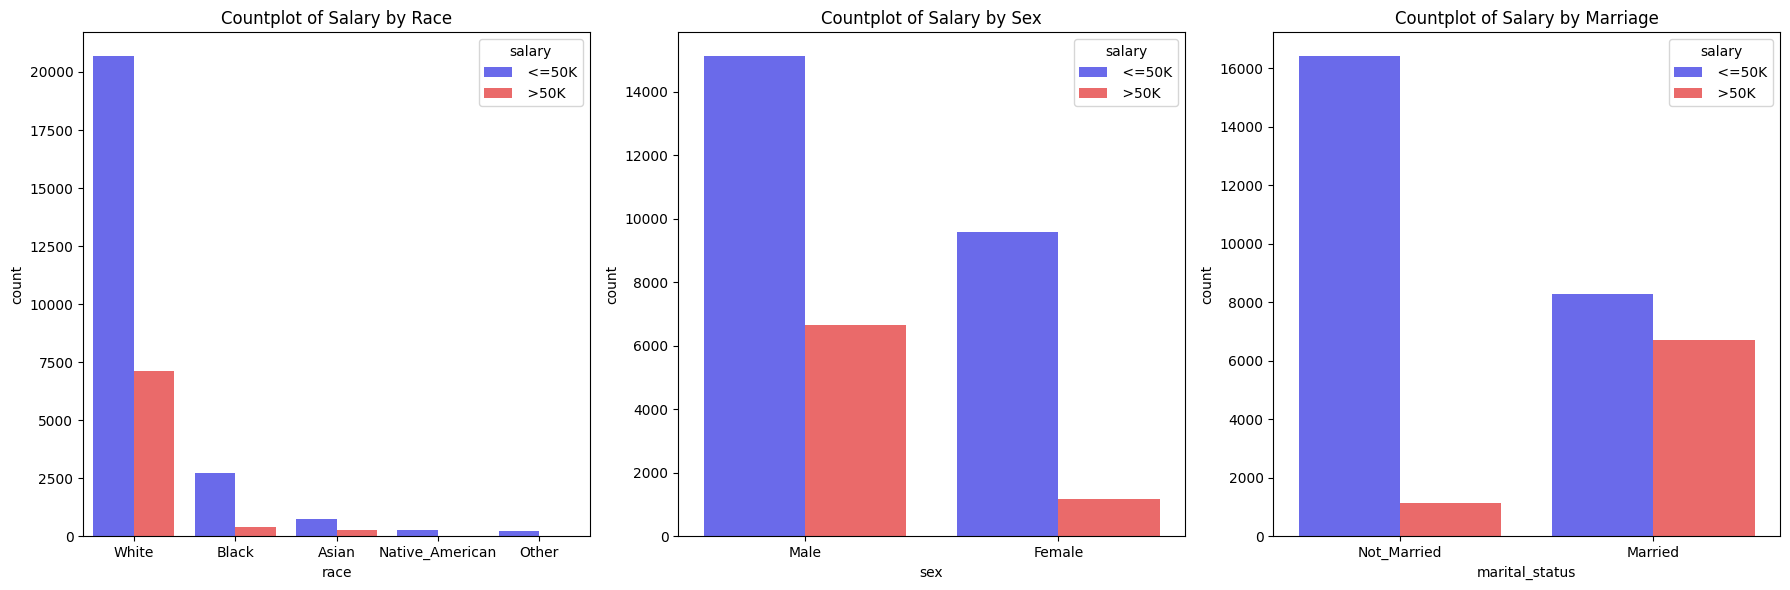

In [ ]:
# CountPlots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust ncols if you wanna add more graphs

sns.countplot(x='race', data=d, hue='salary', ax=axes[0], palette="seismic")
axes[0].set_title('Countplot of Salary by Race')

sns.countplot(x='sex', data=d, hue='salary', ax=axes[1], palette="seismic")
axes[1].set_title('Countplot of Salary by Sex')

sns.countplot(x='marital_status', data=d, hue='salary', ax=axes[2], palette="seismic")
axes[2].set_title('Countplot of Salary by Marriage')

plt.tight_layout()
plt.show()

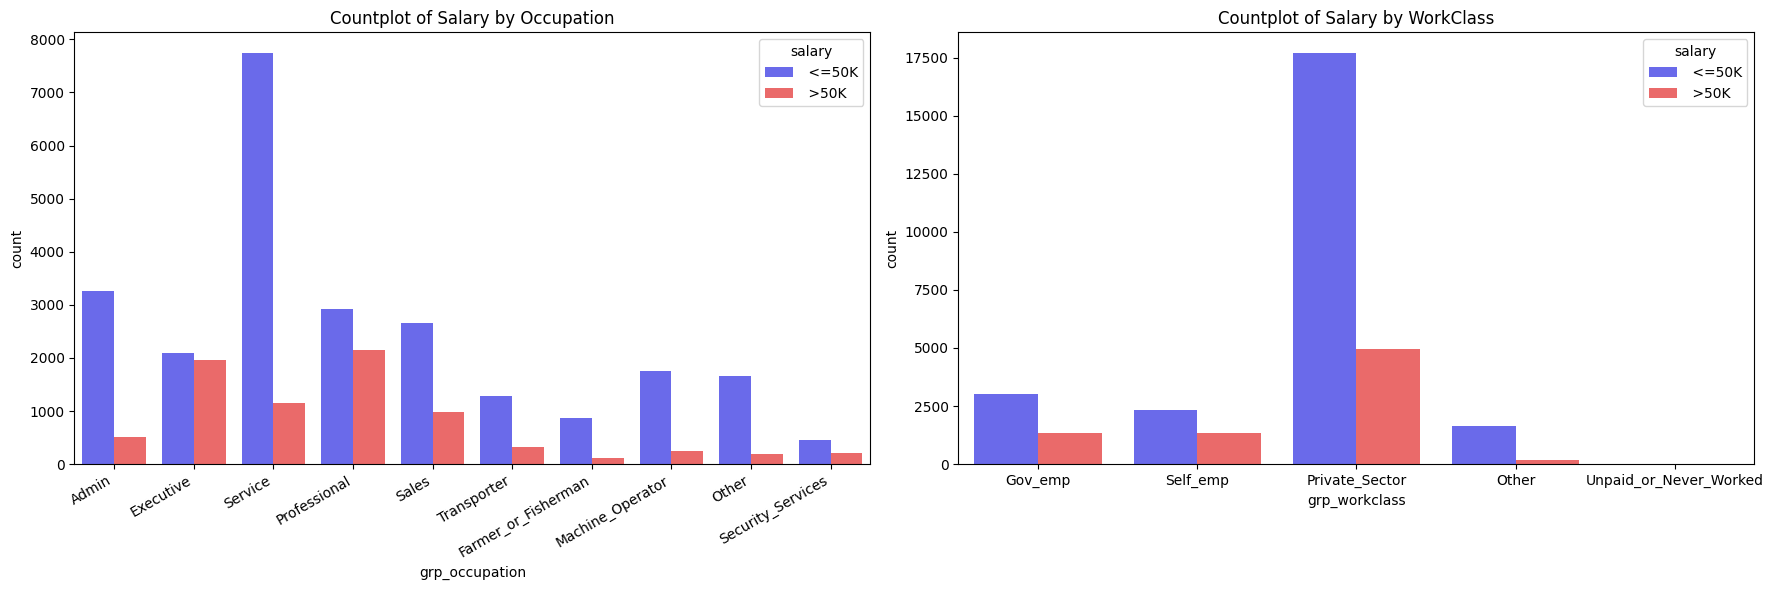

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='grp_workclass', data=d, hue='salary', ax=axes[1], palette="seismic")
axes[1].set_title('Countplot of Salary by WorkClass')

sns.countplot(x='grp_occupation', data=d, hue='salary', ax=axes[0], palette="seismic")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, horizontalalignment='right')
axes[0].set_title('Countplot of Salary by Occupation')

plt.tight_layout()
plt.show()

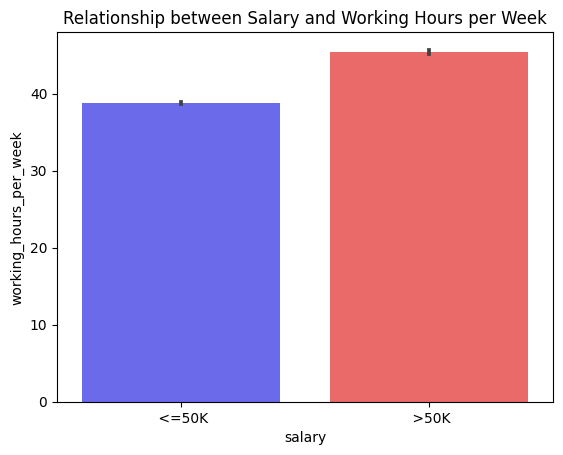

In [ ]:
# A full-time work week is generally considered to be 40 hours, equating to 8 hours a day for 5 days a week.
# Considering the bar reaching beyond 40 hours (for >50K) shows that there are instances where it's a 6-day week (an assumption you dipshit)
# And the working hours might be less than 8 hours (approximately 6-7 hours).
sns.barplot(x='salary', y='working_hours_per_week', data=d, palette="seismic")
plt.title('Relationship between Salary and Working Hours per Week')
plt.show()

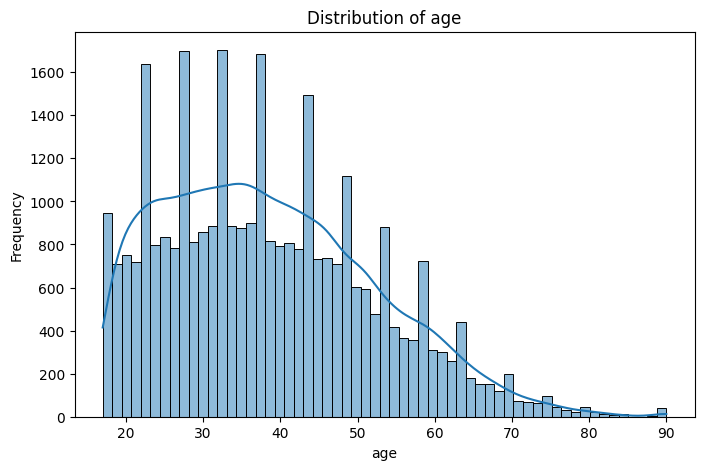

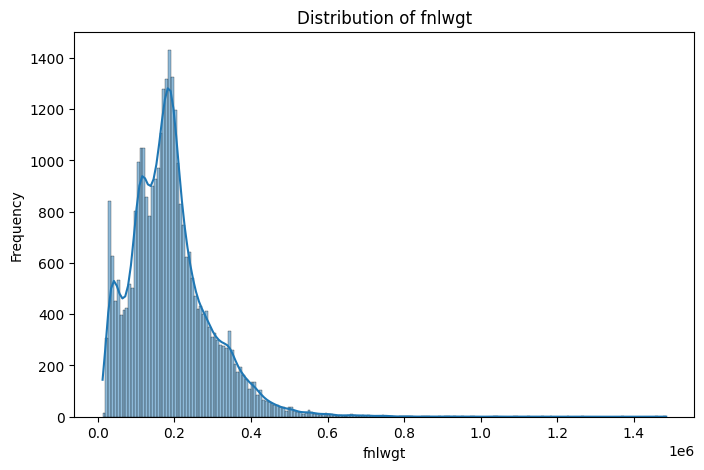

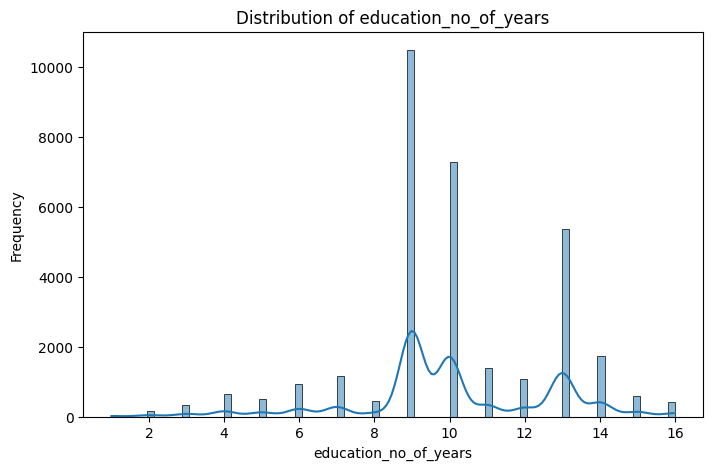

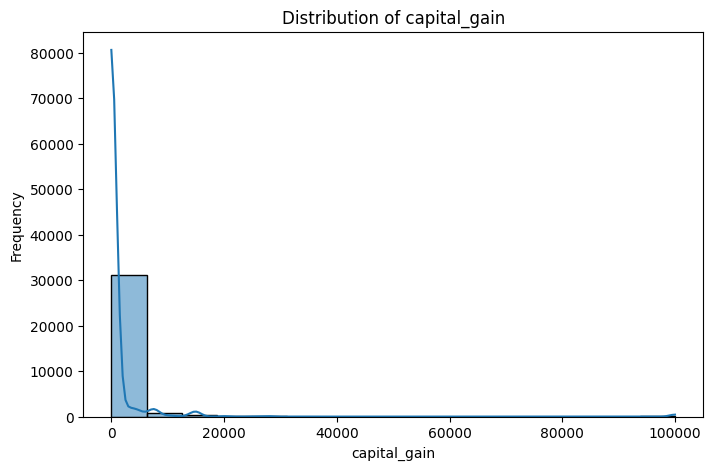

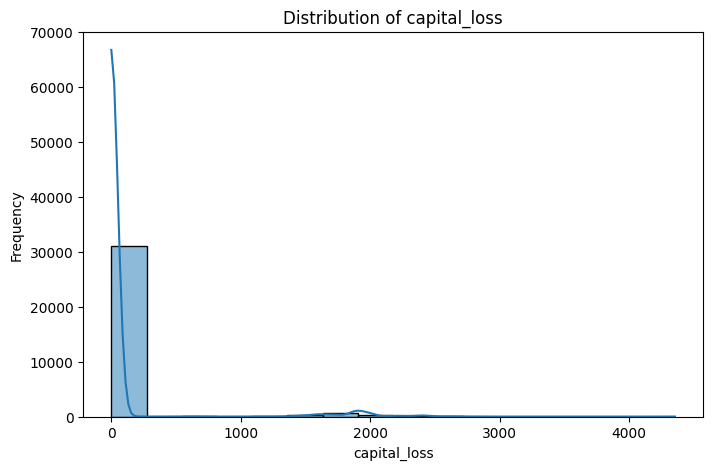

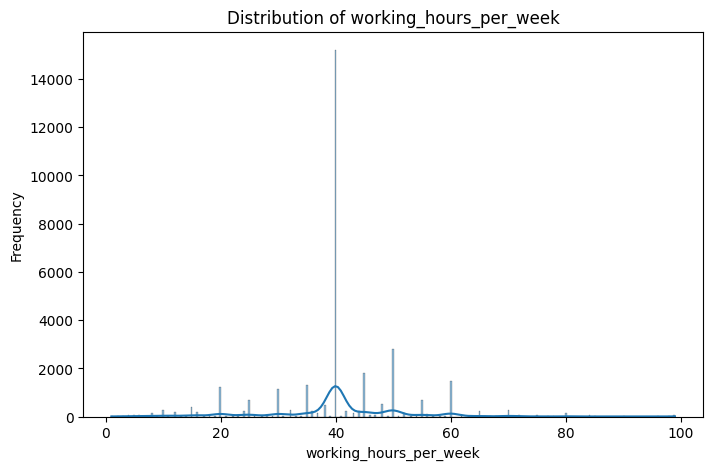

In [ ]:
# Plotting pairplot for numeric columns
numeric_cols = d.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(d[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Right now, we'll just create a new copy and proceed to Feature Engineering. Just in case if any more of EDA via graphs, has to been to done.

In [ ]:
d.skew()

age                        0.557459
fnlwgt                     1.447465
education_no_of_years     -0.309634
capital_gain              11.948291
capital_loss               4.592221
working_hours_per_week     0.228737
dtype: float64

In [ ]:
for col in numeric_cols:
    unique_values = d[col].unique()
    print(f'Unique values for {col}:\n{unique_values}\n')

Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for fnlwgt:
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for education_no_of_years:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for capital_gain:
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310

In [ ]:
from scipy.stats import skew
def log_transform_and_plot(df, column):
    original_skewness = skew(df[column])

    # Apply log1p transformation
    df[column + '_transformed'] = np.log1p(df[column])
    transformed_skewness = skew(df[column + '_transformed'])

    # Plot original and transformed distributions
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column} (Original)')
    sns.histplot(df[column + '_transformed'], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {column} (Transformed)')
    plt.show()

    print(f"{column} skewness before transformation: {original_skewness:.2f}")
    print(f"{column} skewness after log1p transformation: {transformed_skewness:.2f}")

    df.drop(column, axis=1, inplace=True)

In [ ]:
d.isnull().sum()

age                        0
fnlwgt                     0
education_no_of_years      0
marital_status             0
race                       0
sex                        0
capital_gain               0
capital_loss               0
working_hours_per_week     0
native_contienent          0
salary                     0
grp_workclass              0
grp_education             50
grp_occupation             0
dtype: int64

In [ ]:
mode_education = d['grp_education'].mode()[0]
d['grp_education'].fillna(mode_education, inplace=True)

In [ ]:
d2 = d.copy()

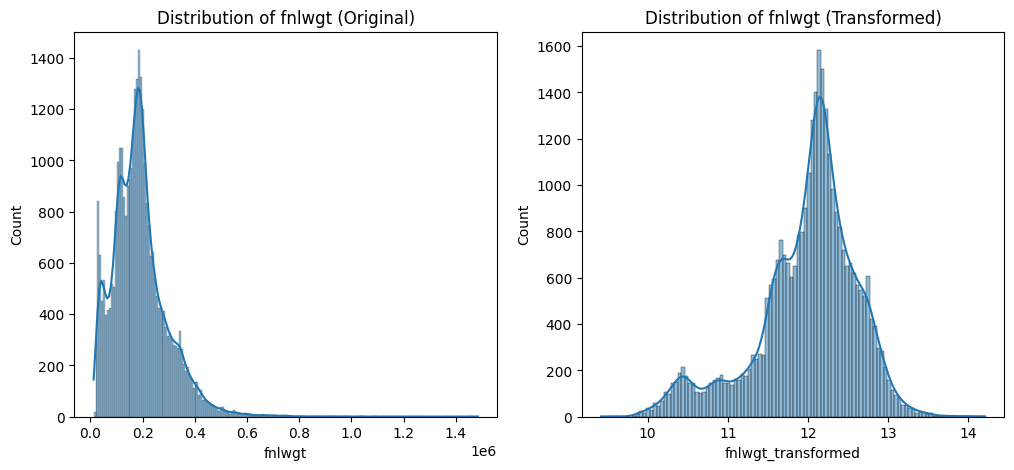

fnlwgt skewness before transformation: 1.45
fnlwgt skewness after log1p transformation: -0.84


In [ ]:
log_transform_and_plot(d2, 'fnlwgt')

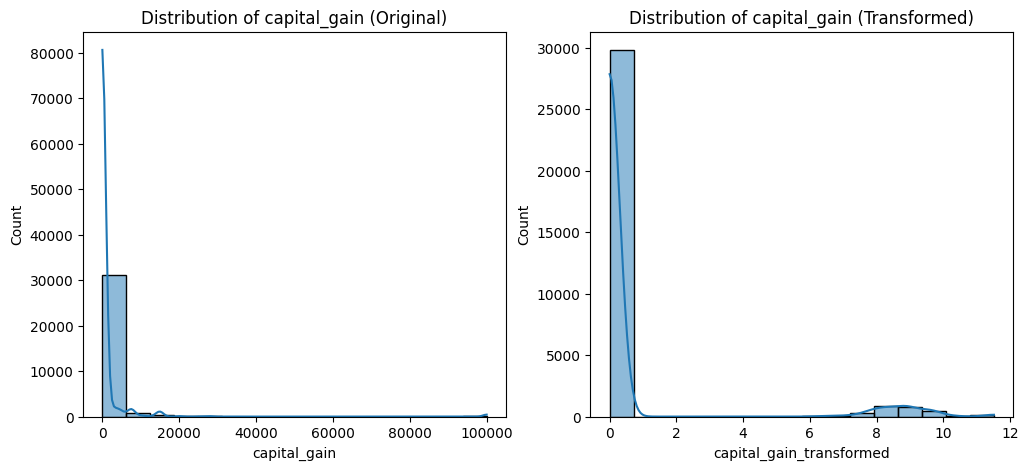

capital_gain skewness before transformation: 11.95
capital_gain skewness after log1p transformation: 3.09


In [ ]:
log_transform_and_plot(d2, 'capital_gain')

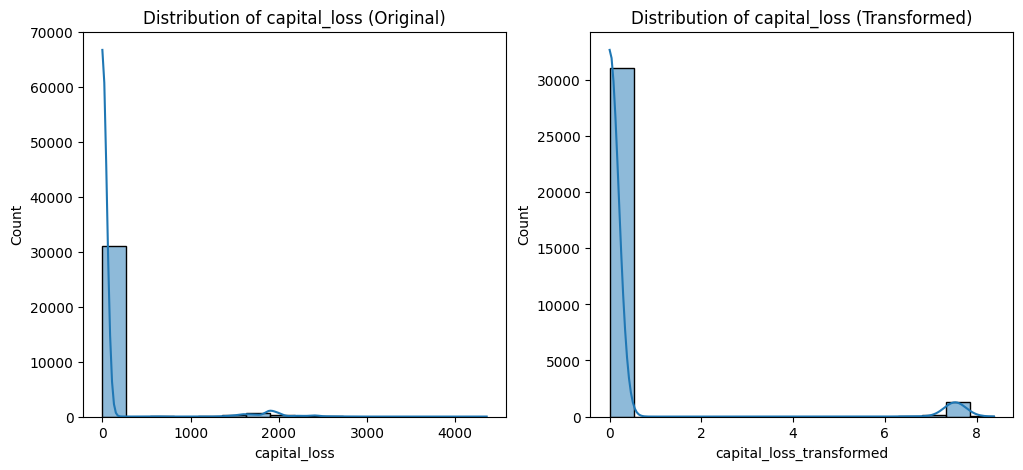

capital_loss skewness before transformation: 4.59
capital_loss skewness after log1p transformation: 4.31


In [ ]:
log_transform_and_plot(d2, 'capital_loss')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['education_no_of_years', 'age', 'working_hours_per_week', 'fnlwgt_transformed',	'capital_gain_transformed',	'capital_loss_transformed']
d2[cols_to_scale] = scaler.fit_transform(d2[cols_to_scale])

In [ ]:
d2.describe()

,age,education_no_of_years,working_hours_per_week,fnlwgt_transformed,capital_gain_transformed,capital_loss_transformed
count,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000
mean,0.295731,0.605464,0.402459,0.535531,0.063867,0.041843
std,0.186817,0.171456,0.125995,0.131552,0.213305,0.189184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.397959,0.471511,0.000000,0.000000
50%,0.273973,0.600000,0.397959,0.558014,0.000000,0.000000
75%,0.424658,0.733333,0.448980,0.617307,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for i in d:
  if d[i].dtype == 'object':
    print(i, d[i].unique(), "\n")

marital_status ['Not_Married' 'Married'] 

race ['White' 'Black' 'Asian' 'Native_American' 'Other'] 

sex ['Male' 'Female'] 

native_contienent ['north_america' 'asia' 'other' 'europe' 'south_america'] 

salary [' <=50K' ' >50K'] 

grp_workclass ['Gov_emp' 'Self_emp' 'Private_Sector' 'Other' 'Unpaid_or_Never_Worked'] 

grp_education ['Bachelors' 'HS_grad' 'Higher_Secondary_School' 'Masters' 'High_School'
 'Other' 'Associate_Degree' 'Doctorate' 'Professional_School'] 

grp_occupation ['Admin' 'Executive' 'Service' 'Professional' 'Sales' 'Transporter'
 'Farmer_or_Fisherman' 'Machine_Operator' 'Other' 'Security_Services'] 



In [ ]:
objects = []
for col in d2:
    if d2[col].dtypes == 'object':
        objects.append(col)

print(objects)

['marital_status', 'race', 'sex', 'native_contienent', 'salary', 'grp_workclass', 'grp_education', 'grp_occupation']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in objects:
    d2[col] = label_encoder.fit_transform(d2[col])

d2.describe()

,age,education_no_of_years,marital_status,race,sex,working_hours_per_week,native_contienent,salary,grp_workclass,grp_education,grp_occupation,fnlwgt_transformed,capital_gain_transformed,capital_loss_transformed
count,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000,32531.000000
mean,0.295731,0.605464,0.539117,3.557007,0.669300,0.402459,1.970336,0.240970,1.789739,3.753312,4.819956,0.535531,0.063867,0.041843
std,0.186817,0.171456,0.498475,1.106627,0.470472,0.125995,0.364012,0.427679,0.813765,2.357565,2.979727,0.131552,0.213305,0.189184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,4.000000,0.000000,0.397959,2.000000,0.000000,2.000000,2.000000,2.000000,0.471511,0.000000,0.000000
50%,0.273973,0.600000,1.000000,4.000000,1.000000,0.397959,2.000000,0.000000,2.000000,3.000000,5.000000,0.558014,0.000000,0.000000
75%,0.424658,0.733333,1.000000,4.000000,1.000000,0.448980,2.000000,0.000000,2.000000,6.000000,8.000000,0.617307,0.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,8.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       32531 non-null  float64
 1   education_no_of_years     32531 non-null  float64
 2   marital_status            32531 non-null  int64  
 3   race                      32531 non-null  int64  
 4   sex                       32531 non-null  int64  
 5   working_hours_per_week    32531 non-null  float64
 6   native_contienent         32531 non-null  int64  
 7   salary                    32531 non-null  int64  
 8   grp_workclass             32531 non-null  int64  
 9   grp_education             32531 non-null  int64  
 10  grp_occupation            32531 non-null  int64  
 11  fnlwgt_transformed        32531 non-null  float64
 12  capital_gain_transformed  32531 non-null  float64
 13  capital_loss_transformed  32531 non-null  float64
dtypes: flo

#### Data-Split / Training / Testing

In [ ]:
X = d2.drop('salary', axis = 1)
y = d2['salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
def get_recall_score(model):

    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    res1 = print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    res2 = print("Recall on test set :", metrics.recall_score(y_test, pred_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', class_weight = {0: 0.11, 1: 0.89}, random_state=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score1 = get_recall_score(model)
print(f"\n{rec_score1}")

Accuracy: 81.78%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7428
           1       0.62      0.60      0.61      2332

    accuracy                           0.82      9760
   macro avg       0.75      0.74      0.75      9760
weighted avg       0.82      0.82      0.82      9760

Recall on training set :  1.0
Recall on test set : 0.6024871355060034

None


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
hp_tuned_dt = random_search.best_estimator_
accuracy_random = hp_tuned_dt.score(X_test, y_test)
print("\nAccuracy on Test Set (Random Search):", accuracy_random)
hp_tuned_dt.fit(X_train, y_train)
y_pred = hp_tuned_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {round(accuracy,4)*100}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score2 = get_recall_score(hp_tuned_dt)
print(f"\n{rec_score2}")

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}

Accuracy on Test Set (Random Search): 0.7890368852459017

Accuracy: 78.9%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      7428
           1       0.55      0.68      0.61      2332

    accuracy                           0.79      9760
   macro avg       0.72      0.75      0.73      9760
weighted avg       0.81      0.79      0.80      9760

Recall on training set :  1.0
Recall on test set : 0.6771012006861064

None


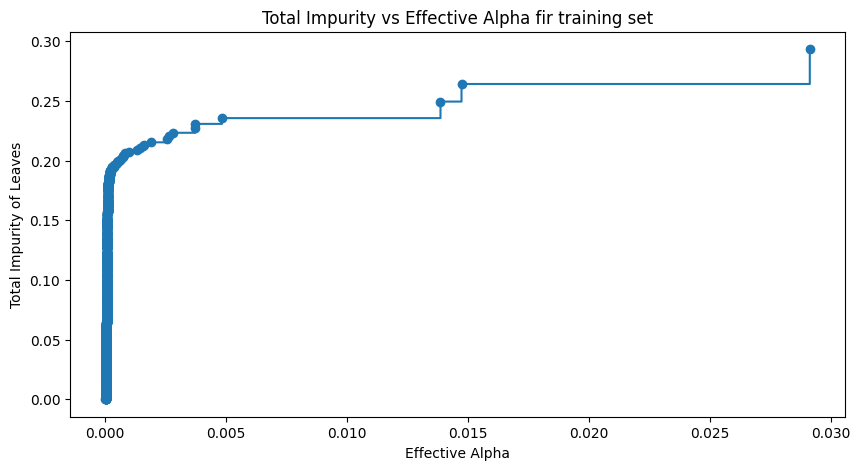

In [ ]:
# When Observed more accumulation, chacnes are the model might overfit
# clf = DecisionTreeClassifier(random_state=1, class_weight={1: 0.11, 2: 0.89})
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
# Cost_Complexity_Pruning Path
# CCP_alpha - least impurites,
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha fir training set")
plt.show()
# Identify the region where the total impurity decreases.
# You are looking for a point where the impurity starts to level off.
# You might want to choose the smallest ccp_alpha that is in this region.

In [ ]:
clfs = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha = i)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, round(ccp_alphas[-1], 4)))

Number of nodes in last tree is: 3 with ccp_alpha: 0.0733


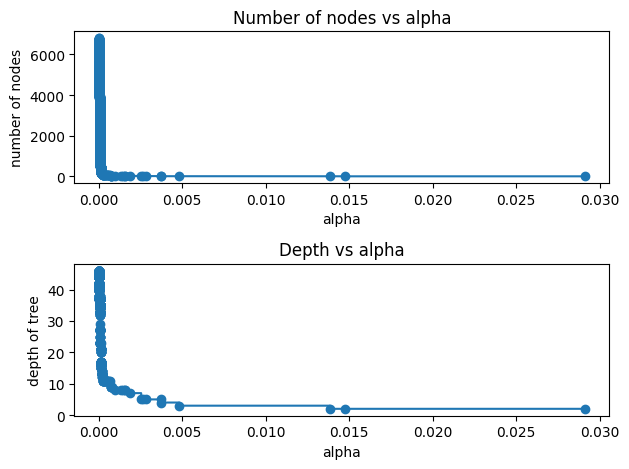

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

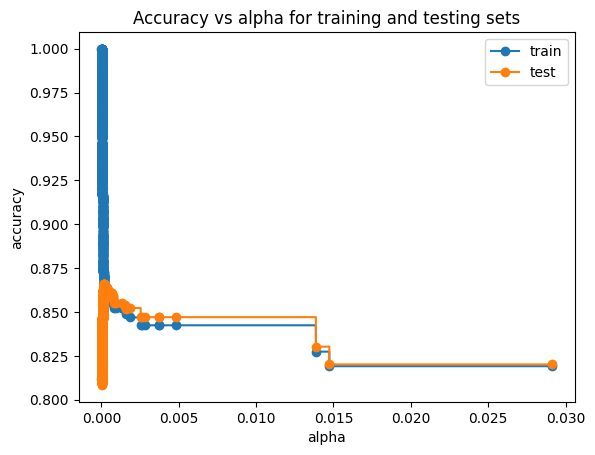

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
# Read the data from right to left
# Choose a range where data point of Train and Test is close to each other

In [ ]:
recall_train = []

for clf in clfs:
    pred_train3 = clf.predict(X_train)
    value_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(value_train)

In [ ]:
recall_test = []

for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

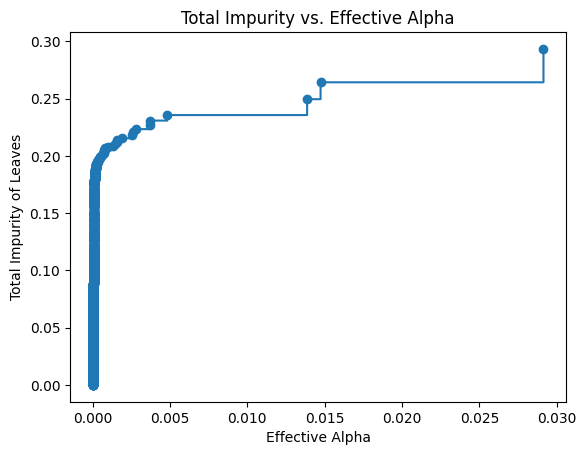

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs. Effective Alpha")
plt.show()

In [ ]:
ccp_tuned_dt = DecisionTreeClassifier(ccp_alpha =0.000)
ccp_tuned_dt.fit(X_train, y_train)
rec_score3 = get_recall_score(ccp_tuned_dt)
print(f"\n{rec_score3}")

Recall on training set :  0.999636825857999
Recall on test set : 0.6110634648370498

None


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)
rec_score4 = get_recall_score(grad_model)
print(f"\n{rec_score4}")

Recall on training set :  0.6114036680588342
Recall on test set : 0.6243567753001715

None


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
gb_clf = GradientBoostingClassifier()

# Define the parameter grid to search
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2 - 0.01),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
tuned_grad_model = random_search.best_estimator_
y_pred = tuned_grad_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Validation Accuracy:", accuracy)
rec_score5 = get_recall_score(tuned_grad_model)
print(f"\n{rec_score5}")

Best Parameters: {'learning_rate': 0.09584520226705186, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 148, 'subsample': 0.8}
Validation Accuracy: 0.8753073770491804
Recall on training set :  0.6611585255129835
Recall on test set : 0.6556603773584906

None


In [ ]:
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier(criterion='gini')

# Create a Bagging Classifier without class weights
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators = 50, max_samples = 0.8, oob_score = True)
bagging_classifier.fit(X_train, y_train)
print(f"Out of Bag score: {bagging_classifier.oob_score_}")
print("\n")
rec_score6 = get_recall_score(bagging_classifier)
print(f"\n{rec_score6}")
# A high OOB score indicates that the bagging classifier is performing well on unseen instances during training.

Out of Bag score: 0.8480084317772606


Recall on training set :  0.9789358997639368
Recall on test set : 0.6179245283018868

None


In [ ]:
param_dist = {
    'n_estimators': randint(50, 150),
    'max_samples': [0.5, 0.7, 0.8, 1.0],
    'max_features': [0.5, 0.7, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

# Adjust the number of iterations (n_iter) based on your preference
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, oob_score=True, random_state=42)
random_search = RandomizedSearchCV(bagging_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='recall', n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
bagging_classifier_tuned = random_search.best_estimator_

y_pred_random = bagging_classifier_tuned.predict(X_test)
recall_random = recall_score(y_test, y_pred_random)
print("Best Parameters (Random Search):", best_params_random)
rec_score7 = get_recall_score(bagging_classifier_tuned)
print(f"\n{rec_score7}")

Best Parameters (Random Search): {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 65}
Recall on training set :  0.991646994733975
Recall on test set : 0.6247855917667239

None


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=150, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score8 = get_recall_score(adaboost_model)
print(f"\n{rec_score8}")

Accuracy: 86.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7428
           1       0.77      0.64      0.70      2332

    accuracy                           0.87      9760
   macro avg       0.83      0.79      0.81      9760
weighted avg       0.86      0.87      0.86      9760

Recall on training set :  0.6199382603958599
Recall on test set : 0.638507718696398

None


In [ ]:
param_dist_adaboost = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 1.0),
    'algorithm': ['SAMME', 'SAMME.R'],
}

base_classifier_adaboost = DecisionTreeClassifier(criterion='entropy')
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier_adaboost)
random_search_adaboost = RandomizedSearchCV(adaboost_classifier, param_distributions=param_dist_adaboost, n_iter=20, cv=5, scoring='recall', n_jobs=-1, random_state=1)
random_search_adaboost.fit(X_train, y_train)
best_params_adaboost = random_search_adaboost.best_params_
adaboost_classifier_tuned = random_search_adaboost.best_estimator_

y_pred_adaboost = adaboost_classifier_tuned.predict(X_test)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
print("Best Parameters (AdaBoost - Random Search):", best_params_adaboost)
print("\n")
rec_score9 = get_recall_score(adaboost_classifier_tuned)
print(rec_score9)

Best Parameters (AdaBoost - Random Search): {'algorithm': 'SAMME', 'learning_rate': 0.7933144726948862, 'n_estimators': 130}


Recall on training set :  1.0
Recall on test set : 0.614065180102916
None


In [ ]:
import random
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 201),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced', {0: 0.11, 1: 0.89}],
    'criterion': ['gini', 'entropy'],
}

rf_classifier = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='recall', random_state=1, n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
rf_model_tuned = random_search.best_estimator_
y_pred_random = rf_model_tuned.predict(X_test)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_random))
rec_score10 = get_recall_score(rf_model_tuned)
print(f"\n{rec_score10}")

Best Parameters: {'class_weight': {0: 0.11, 1: 0.89}, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 74}
Accuracy: 86.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      7428
           1       0.49      0.94      0.64      2332

    accuracy                           0.75      9760
   macro avg       0.73      0.81      0.72      9760
weighted avg       0.86      0.75      0.77      9760

Recall on training set :  0.9631378245868895
Recall on test set : 0.9382504288164666

None


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score11 = get_recall_score(rf_classifier)
print(f"\n{rec_score11}")

Accuracy: 85.66%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7428
           1       0.74      0.62      0.67      2332

    accuracy                           0.86      9760
   macro avg       0.81      0.77      0.79      9760
weighted avg       0.85      0.86      0.85      9760

Recall on training set :  0.9998184129289994
Recall on test set : 0.6183533447684391

None


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rec_score12 = get_recall_score(xgb_classifier)
print(f"\n{rec_score12}")

Accuracy: 87.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7428
           1       0.76      0.66      0.71      2332

    accuracy                           0.87      9760
   macro avg       0.83      0.80      0.81      9760
weighted avg       0.87      0.87      0.87      9760

Recall on training set :  0.7474123842382422
Recall on test set : 0.6595197255574614

None


In [ ]:
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'colsample_bylevel': uniform(0.5, 0.5),
    'gamma': uniform(0, 1)
}

random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)
xgb_model_tuned = random_search.best_estimator_
y_pred_xgb = xgb_model_tuned.predict(X_test)
print(f"\nAccuracy: {round(accuracy,4)*100}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
rec_score13 = get_recall_score(xgb_model_tuned)
print(f"\n{rec_score13}")

Best Parameters: {'colsample_bylevel': 0.7962072844310213, 'colsample_bytree': 0.5232252063599989, 'gamma': 0.6075448519014384, 'learning_rate': 0.06115723710618746, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 181, 'subsample': 0.9711008778424264}

Accuracy: 87.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7428
           1       0.78      0.65      0.71      2332

    accuracy                           0.87      9760
   macro avg       0.84      0.80      0.81      9760
weighted avg       0.87      0.87      0.87      9760

Recall on training set :  0.6983838750680952
Recall on test set : 0.6526586620926244

None


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

metrics_df = pd.DataFrame(columns=['Model', 'Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1', 'Train_Accuracy', 'Test_Accuracy'])

def append_metrics(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)

    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)

    train_f1 = f1_score(y_train, train_preds)
    test_f1 = f1_score(y_test, test_preds)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    metrics_df.loc[len(metrics_df)] = [model_name, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1, train_accuracy, test_accuracy]

models = [model, hp_tuned_dt, ccp_tuned_dt, grad_model, tuned_grad_model, bagging_classifier,
          bagging_classifier_tuned, adaboost_model, adaboost_classifier_tuned, rf_classifier, rf_model_tuned, xgb_classifier, xgb_model_tuned]

model_names = ['Decision-Tree', 'Decision-Tree (Tuned)', 'Decision-Tree (CCP-Tuned)', 'Gradient-Boosting', 'Gradient-Boosting (Tuned)', 'Bagging',
               'Bagging (Tuned)', 'AdaBoost','AdaBoost (Tuned)', 'Random-Forest', 'Random-Forest (Tuned)', 'XGBoost', 'XGBoost (Tuned)']

for model, model_name in zip(models, model_names):
    append_metrics(model, model_name, X_train, y_train, X_test, y_test)

metrics_df

,Model,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_Accuracy,Test_Accuracy
0,Decision-Tree,1.000000,0.602487,0.999637,0.622784,0.999818,0.612467,0.999912,0.817828
1,Decision-Tree (Tuned),1.000000,0.677101,0.784361,0.547314,0.879151,0.605329,0.933512,0.789037
2,Decision-Tree (CCP-Tuned),0.999637,0.613208,1.000000,0.598076,0.999818,0.605547,0.999912,0.809119
3,Gradient-Boosting,0.611404,0.624357,0.790933,0.784060,0.689676,0.695154,0.866936,0.869160
4,Gradient-Boosting (Tuned),0.661340,0.655232,0.803974,0.786008,0.725715,0.714687,0.879101,0.875000
5,Bagging,0.953151,0.594340,0.991500,0.725275,0.971947,0.653311,0.986694,0.849283
6,Bagging (Tuned),0.991647,0.624786,0.997990,0.722718,0.994808,0.670193,0.997497,0.853074
7,AdaBoost,0.619938,0.638508,0.763417,0.766341,0.684237,0.696608,0.861622,0.867111
8,AdaBoost (Tuned),1.000000,0.620926,0.999637,0.610970,0.999818,0.615908,0.999912,0.814959
9,Random-Forest,0.999637,0.613636,0.999818,0.730475,0.999728,0.666977,0.999868,0.853586
